In [30]:
#Clean data description
# I downloaded the data from http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29
# There were no headers so i created the header based on the data description
import pandas as pd

#Read file
df = pd.read_csv('breast-cancer-wisconsin.csv', sep=',')

#Create dataframe not including code column as well as bare_nueceli column
# I remove the first column because it was an item code and not needed for this and the bare_nuceli column because it has a ? mark sometimes there.
cleaned = df[['thickness', 'uniformity_size', 'uniformity_shape', 'marginal_adhesion', 'epithelial_cell_size', 'bland_chromatin', 'normal_nucleoli', 'mitosis', 'class']].copy()



In [31]:
# Describe data set
import matplotlib.pyplot as plt; plt.rcdefaults()

# Get an idea of what the average data looks like for malignant and benign classes in a table form
means = cleaned.groupby("class").mean()
print(means)


       thickness  uniformity_size  uniformity_shape  marginal_adhesion  \
class                                                                    
2       2.956332         1.325328          1.443231           1.364629   
4       7.195021         6.572614          6.560166           5.547718   

       epithelial_cell_size  bland_chromatin  normal_nucleoli   mitosis  
class                                                                    
2                  2.120087         2.100437         1.290393  1.063319  
4                  5.298755         5.979253         5.863071  2.589212  


<AxesSubplot:>

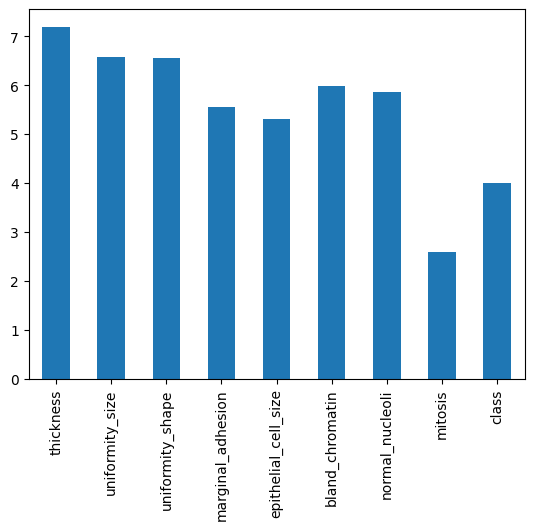

In [32]:
# Visualize what the average data looks like for malignant in bar chart form
four_row = cleaned.loc[cleaned['class'] == 4].mean()
four_row.plot.bar()

<AxesSubplot:>

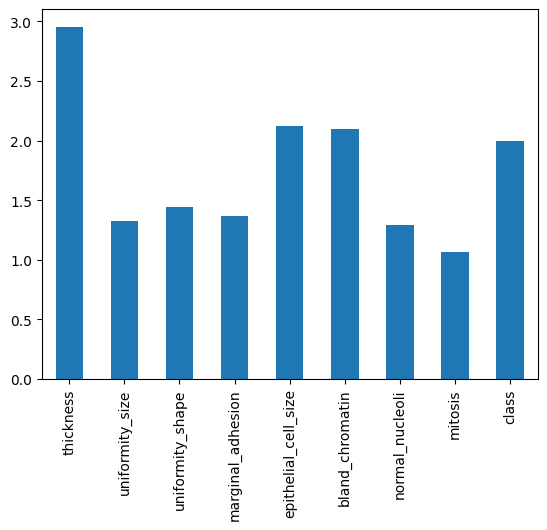

In [33]:
# Visualize what the average data looks like for benign in bar chart form

two_row = cleaned.loc[cleaned['class'] == 2].mean()
two_row.plot.bar()

In [40]:
# Do support vector machine analysis
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

# Create input/output data sets for the model
X = cleaned.drop('class', axis=1)
y = cleaned['class']

#Train the data
# Check the randomization
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

#Select classification algorithm
svclassifier = SVC(kernel='linear')

#Fit the model
svclassifier.fit(X_train, y_train)

#Do the analysis
y_pred = svclassifier.predict(X_test)


#show results
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))




Accuracy: 0.9642857142857143
